# ✅ Unemployment Analysis with Python – Full Code
## Ensure you have the necessary libraries installed:

pip install pandas numpy matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


## 1. Set Up and Download Dataset
### Ensure the Kaggle API is configured:

In [8]:
import kagglehub

df = kagglehub.dataset_download("pantanjali/unemployment-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\pantanjali\unemployment-dataset\versions\1


In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/path/to/.kaggle/'

!kaggle datasets download -d gokulrajkmv/unemployment-in-india

import zipfile
with zipfile.ZipFile('unemployment-in-india.zip', 'r') as zip_ref:
    zip_ref.extractall('unemployment_dataset')

print("Dataset downloaded and extracted successfully!")


Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india
License(s): other

Dataset downloaded and extracted successfully!



  0%|          | 0.00/16.0k [00:00<?, ?B/s]
100%|##########| 16.0k/16.0k [00:00<00:00, 251kB/s]


### 2. Load the Dataset

In [3]:
import pandas as pd

file_path = 'unemployment_dataset/Unemployment_Rate_upto_11_2020.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

### 3. Data Cleaning
#### Check for missing values and clean the data:

In [10]:
print(df.isnull().sum())
df.dropna(inplace=True)

print(df.columns)
df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')




### 4. Exploratory Data Analysis (EDA)
#### a) Unemployment Rate Over Time

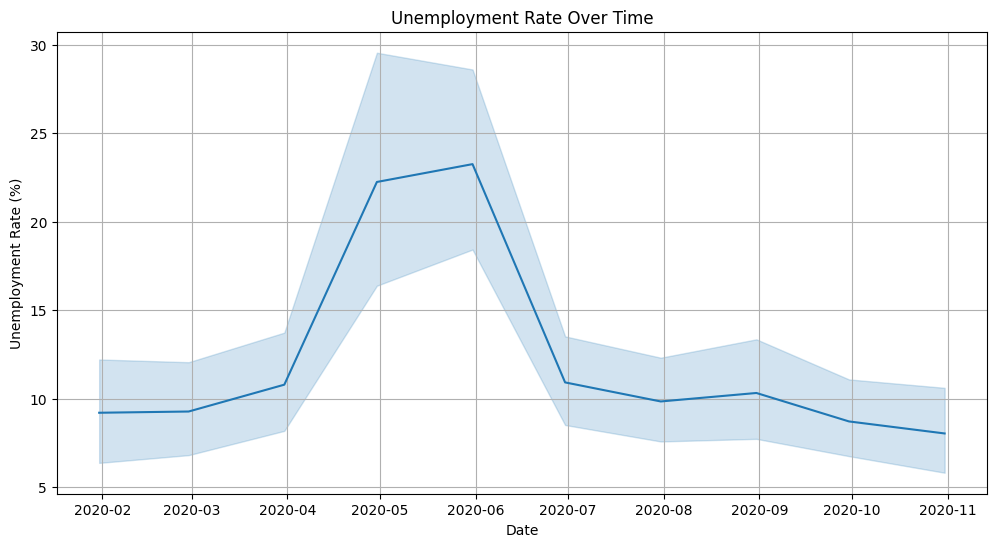

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])

# Plot Unemployment Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()




#### b) Unemployment by Region

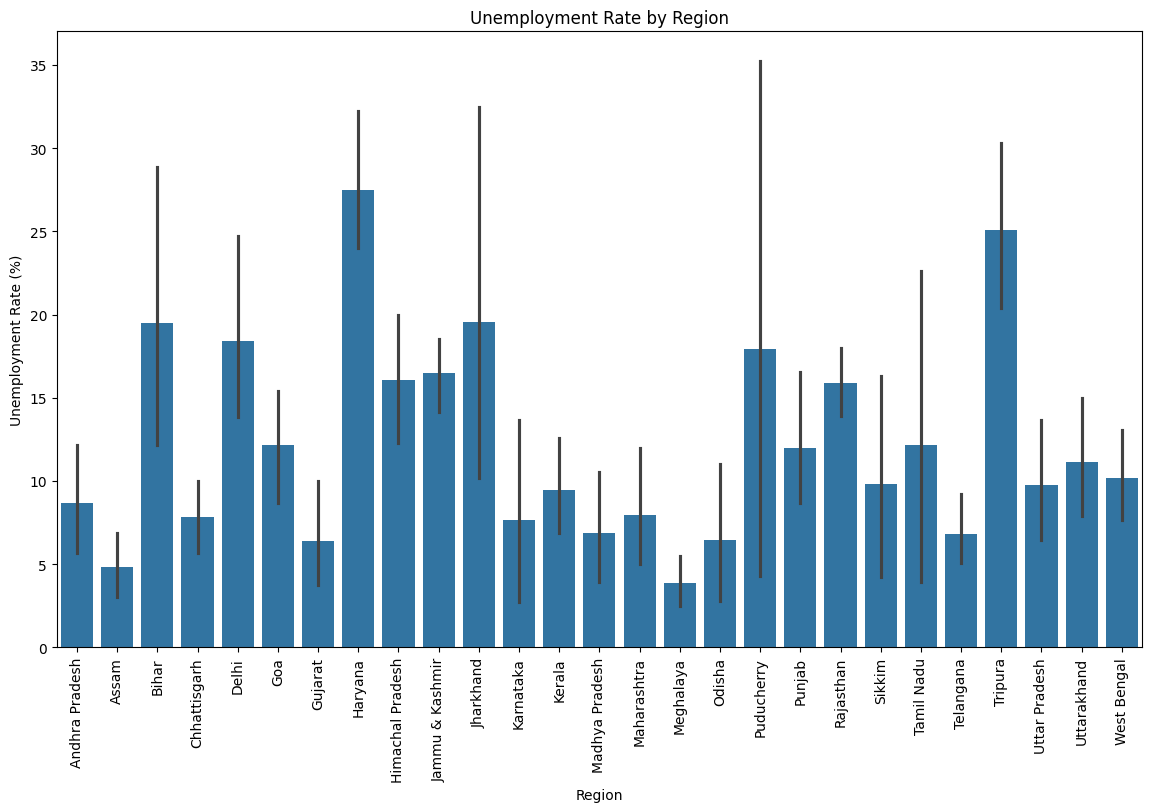

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.show()


### 5. COVID-19 Impact on Unemployment

#### Analyze unemployment before and after March 2020:

In [23]:
df.columns = df.columns.str.strip()

pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

print("Pre-COVID Average Unemployment Rate:", pre_covid['Estimated Unemployment Rate (%)'].mean())
print("Post-COVID Average Unemployment Rate:", post_covid['Estimated Unemployment Rate (%)'].mean())


Pre-COVID Average Unemployment Rate: 9.231346153846154
Post-COVID Average Unemployment Rate: 12.963860465116278


6. Moving Average for Trends

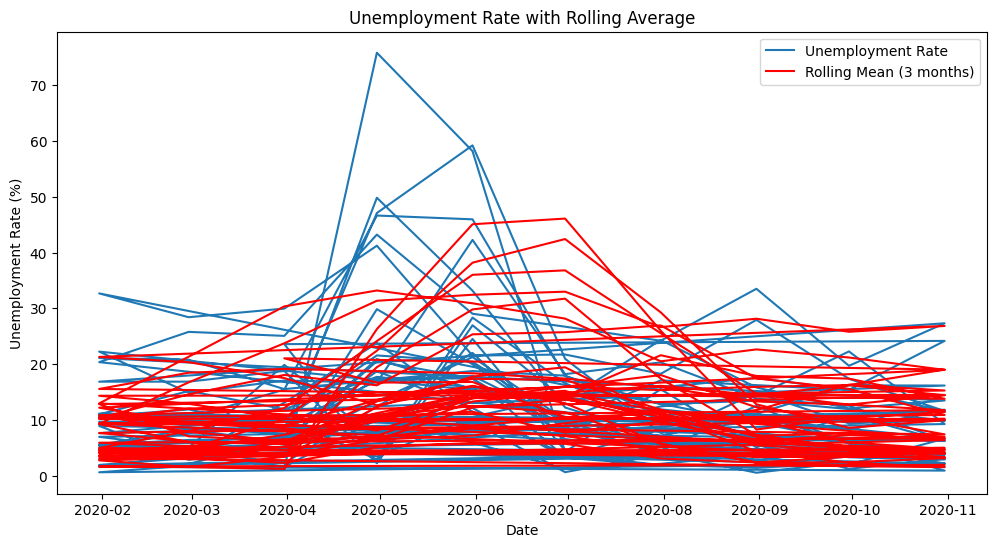

In [24]:
# Ensure column names are cleaned
df.columns = df.columns.str.strip()

# Calculate rolling mean for smoothing (3-month window)
df['Rolling_Mean'] = df['Estimated Unemployment Rate (%)'].rolling(3).mean()

# Plot Unemployment Rate with Rolling Average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.plot(df['Date'], df['Rolling_Mean'], label='Rolling Mean (3 months)', color='red')
plt.title('Unemployment Rate with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()


OPTIONAL

✅ Step 1: Add Machine Learning Models for Prediction


We will train a Linear Regression model to predict future unemployment rates.

📊 1. Set Up the Environment
Ensure required packages are installed:

In [25]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


📈 2. Prepare the Data

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Clean column names
df.columns = df.columns.str.strip()

# Ensure Date is in datetime format and sort by time
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Feature Engineering: Convert Date to numeric
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Define features and target
X = df[['Month', 'Year']]
y = df['Estimated Unemployment Rate (%)']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🔍 3. Train the Model

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 78.74495683398773


📊 4. Predict Future Rates

In [29]:
future_data = pd.DataFrame({'Month': [3, 4, 5], 'Year': [2025, 2025, 2025]})
future_predictions = model.predict(future_data)
print("Future Unemployment Rates (2025):", future_predictions)


Future Unemployment Rates (2025): [13.59828537 13.16379393 12.72930249]
